In [9]:
#USE of Google TREND

In [10]:
#Loaded 
#pip install gtrends 
#https://pypi.python.org/pypi/gtrends/0.1
#https://github.com/GeneralMills/pytrends
#https://pypi.python.org/pypi/pytrends

#http://nbviewer.jupyter.org/github/twiecki/replicate_google_trends/blob/master/goog_repl.ipynb
#https://gist.github.com/gregroberts/11001277

In [9]:
# Requires pandas. For Windows users, I recommend installing the Anaconda Python distirbution.
# Requires the pytrends library. To install, run "pip install pytrends".
#https://github.com/GeneralMills/pytrends
#https://github.com/GeneralMills/pytrends/blob/master/examples/example.py

In [3]:
# Add your Gmail username to the google_username variable and your Gmail password to the google_password variable.
google_username = "senfinance"
google_password = "parthasen2012"

In [10]:
#pyGTrends() not in use
#connector = pyGTrends(google_username, google_password)

In [13]:
import requests
a = requests.get('http://www.google.com/trends/fetchComponent?q=nepal&cid=TIMESERIES_GRAPH_0&export=3')
#a.text

# manually download as csv
https://www.google.com/trends/explore?date=now%201-H&q=nasdaq

http://erikjohansson.blogspot.in/2014/09/automate-google-trends-download-using-r.html

https://christophriedl.net/2013/08/22/google-trends-with-r/

http://amunategui.github.io/google-trends-walkthrough/

https://www.quora.com/What-is-the-way-to-bulk-download-a-CSV-file-from-Google-Trends

path="/home/octo/Downloads/"
filename='multiTimeline'

In [23]:
#name='_' + "GT_min" + '.' + time.strftime('%Y%m%d-%H%M')+ '_' + filename.replace(' ', '_')+".csv"

In [27]:
trend = pd.read_csv("/home/octo/Downloads/multiTimeline.csv",skiprows=4, nrows=60)

In [31]:
#trend['crude oil'] = trend['crude oil'].convert_objects(convert_numeric=True)
#trend['eia'] = trend['eia'].convert_objects(convert_numeric=True)
trend['NASDAQ'] = trend['nasdaq'].convert_objects(convert_numeric=True)

KeyError: 'nasdaq'

In [512]:
#Minute based
for i in range(0,60):
    trend['Time'].ix[i]=pd.Timestamp(trend['Time'].ix[i]).tz_convert('US/Eastern').strftime('%Y-%m-%d %H:%M') #EST

In [513]:
trend.index= trend['Time']

In [514]:
trend=trend.drop('Time',axis=1).dropna()

TWIT

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [516]:
#tweets_data_path ='OIL' + '.' + time.strftime('%Y%m%d-%H%M%S') + '.json'
tweets_data_path ='/home/octo/Desktop/PROJECT/DATA/TWIT/OIL.20160805-192338.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [517]:
tweets = pd.DataFrame()

In [518]:
tweets['created_at'] = map(lambda tweet: tweet['created_at'], tweets_data)
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)

In [519]:
#eastern = timezone('US/Eastern')
eastern = timezone('US/Eastern')
utc = timezone('UTC')
for i in range(1, len(tweets)):
    tweets['created_at'].ix[i]=utc.localize(datetime.strptime(tweets['created_at'].ix[i], '%a %b %d %H:%M:%S +0000 %Y')).astimezone(eastern).strftime('%Y-%m-%d %H:%M')

    #print est_created_at.strftime('%Y-%m-%d %H:%M:%S')
#pd.Timestamp(tweets['created_at'].ix[1]).tz_convert('EST').strftime('%Y-%m-%d %H:%M:%S')

In [520]:
tweets.index=tweets['created_at']
tweets=tweets.drop('created_at',axis=1)

In [521]:
import re

In [523]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [524]:
tweets['Re_Tweet'] = tweets['text'].apply(lambda tweet: word_in_text('RT @', tweet))
tweets['Strike'] = tweets['text'].apply(lambda tweet: word_in_text('strike', tweet))
tweets['stock'] = tweets['text'].apply(lambda tweet: word_in_text('stock', tweet))
tweets['supply'] = tweets['text'].apply(lambda tweet: word_in_text('suppl', tweet))
tweets['inventories'] = tweets['text'].apply(lambda tweet: word_in_text('inventor', tweet))# high N for UP
tweets['rigs'] = tweets['text'].apply(lambda tweet: word_in_text('rigs', tweet))# rise N for UP
tweets['pipeline'] = tweets['text'].apply(lambda tweet: word_in_text('pipeline', tweet))
tweets['price'] = tweets['text'].apply(lambda tweet: word_in_text('price', tweet))
tweets['glut'] = tweets['text'].apply(lambda tweet: word_in_text('glut', tweet))
tweets['fall'] = tweets['text'].apply(lambda tweet: word_in_text('fall', tweet))
tweets['fell'] = tweets['text'].apply(lambda tweet: word_in_text('fell', tweet))
tweets['slide'] = tweets['text'].apply(lambda tweet: word_in_text('slide', tweet))
tweets['plummets'] = tweets['text'].apply(lambda tweet: word_in_text('plummets', tweet))
tweets['rise'] = tweets['text'].apply(lambda tweet: word_in_text('rise', tweet))
tweets['climbs'] = tweets['text'].apply(lambda tweet: word_in_text('climb', tweet))
tweets['down'] = tweets['text'].apply(lambda tweet: word_in_text('down', tweet))
tweets['pummeled'] = tweets['text'].apply(lambda tweet: word_in_text('pummeled', tweet))#decrese of price
tweets['up'] = tweets['text'].apply(lambda tweet: word_in_text('up', tweet)) 
tweets['high'] = tweets['text'].apply(lambda tweet: word_in_text('high', tweet))
tweets['low'] = tweets['text'].apply(lambda tweet: word_in_text('low', tweet)) 
tweets['decline'] = tweets['text'].apply(lambda tweet: word_in_text('decline', tweet)) 
tweets['rebalancing'] = tweets['text'].apply(lambda tweet: word_in_text('rebalancing', tweet))
tweets['imports'] = tweets['text'].apply(lambda tweet: word_in_text('import', tweet))
tweets['export'] = tweets['text'].apply(lambda tweet: word_in_text('export', tweet))
tweets['strong'] = tweets['text'].apply(lambda tweet: word_in_text('strong', tweet))
tweets['weak'] = tweets['text'].apply(lambda tweet: word_in_text('weak', tweet))

In [525]:
tweets=tweets[tweets.Re_Tweet==False]

In [526]:
tweets=tweets[tweets.Strike|tweets.pummeled|tweets.stock|tweets.supply|tweets.inventories|tweets.rigs|tweets.pipeline|tweets.glut|tweets.price|tweets.fall|tweets.fell|tweets.slide|tweets.plummets|tweets.rise|tweets.climbs|tweets.down|tweets.up|tweets.high|tweets.low|tweets.decline|tweets.imports|tweets.export|tweets.strong|tweets.weak==True]

In [527]:
print len(tweets)#nearly 75% noise, we need to decrease noise level

223


In [528]:
tweets['signal']=0#-1=negative +1=positive 0=neutral

In [529]:
tweets['signal']=(tweets.stock & tweets.rise)*-1|(tweets.rigs & tweets.rise)*-1|(tweets.inventories & tweets.rise)*-1|tweets.Strike*1|tweets.down*-1

In [530]:
trend.tail(3)

,crude oil,eia
Time,,
2016-08-05 10:56,64,18
2016-08-05 10:57,65,7
2016-08-05 10:58,94,5


In [531]:
trend['log_oil']=np.log(trend['crude oil'])

IQFeed Data in minute

In [532]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [533]:
from pytz import timezone
import time
from time import gmtime, strftime
os.environ['TZ'] = ':US/Eastern'; 
time.tzset()
ti=time.strftime("%H%M%S")
int(ti)

110643

In [534]:
# downloading price data from IQFeed
# rund DTN and IQdtn before this
%run iqfeed_download.py

In [535]:
path = '/home/octo/Desktop/PROJECT/DATA/MIN/'

In [536]:
data_price=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [537]:
data_price.index=data_price.index.strftime('%Y-%m-%d %H:%M')

In [538]:
#data_price['returns'] = np.log(data_price.close / data_price.close.shift(1))

In [586]:
data_price['change'] = data_price.close-data_price.close.shift(1)

In [587]:
data_price['change'].tail(3)

2016-08-05 10:51    0.0575
2016-08-05 10:52    0.0400
2016-08-05 10:53   -0.0101
Name: change, dtype: float64

In [588]:
tweets[['signal']].tail(3)

,signal
created_at,
2016-08-05 11:06,0
2016-08-05 11:06,0
2016-08-05 11:06,0


In [589]:
trend.tail(3)

,crude oil,eia,log_oil
Time,,,
2016-08-05 10:56,64,18,4.158883
2016-08-05 10:57,65,7,4.174387
2016-08-05 10:58,94,5,4.543295


In [590]:
signal=pd.merge(left=tweets[['signal']], right=trend, left_index=True, right_index=True, how='left')

In [570]:
signal.dropna().tail(3)

,signal,crude oil,eia,log_oil
2016-08-05 10:57,0,65,7,4.174387
2016-08-05 10:57,0,65,7,4.174387
2016-08-05 10:57,0,65,7,4.174387


In [591]:
signal=pd.merge(left=signal, right=data_price[['change']], left_index=True, right_index=True, how='left')

In [592]:
signal=signal.dropna()

In [593]:
signal.dropna().tail(3)

,signal,crude oil,eia,log_oil,change
2016-08-05 10:52,0,68,4,4.219508,0.0400
2016-08-05 10:53,0,53,11,3.970292,-0.0101
2016-08-05 10:53,0,53,11,3.970292,-0.0101


In [594]:
signal['crude oil'].ix[0]

57.0

In [602]:
signal['GT-signal']=signal['crude oil']/signal['crude oil'].ix[0]
signal['price_signal']=signal['change']/signal['change'].ix[0]

In [604]:
signal.index

Index([u'2016-08-05 10:08', u'2016-08-05 10:08', u'2016-08-05 10:08',
       u'2016-08-05 10:08', u'2016-08-05 10:08', u'2016-08-05 10:08',
       u'2016-08-05 10:08', u'2016-08-05 10:09', u'2016-08-05 10:09',
       u'2016-08-05 10:09',
       ...
       u'2016-08-05 10:47', u'2016-08-05 10:47', u'2016-08-05 10:47',
       u'2016-08-05 10:49', u'2016-08-05 10:49', u'2016-08-05 10:49',
       u'2016-08-05 10:52', u'2016-08-05 10:52', u'2016-08-05 10:53',
       u'2016-08-05 10:53'],
      dtype='object', length=135)

In [613]:
for i in range(1, len(signal)):
    signal['time']=pd.Timestamp(signal.index[i]).strftime('%H:%M')

In [616]:
#pd.Timestamp(signal.index[1]).strftime('%H:%M')

'10:08'

In [617]:
signal.index=signal['time']

In [618]:
signal.dropna().tail(3)

,signal,crude oil,eia,log_oil,change,GT-signal,price_signal,time
time,,,,,,,,
10:53,0,68,4,4.219508,0.0400,1.192982,2.000,10:53
10:53,0,53,11,3.970292,-0.0101,0.929825,-0.505,10:53
10:53,0,53,11,3.970292,-0.0101,0.929825,-0.505,10:53


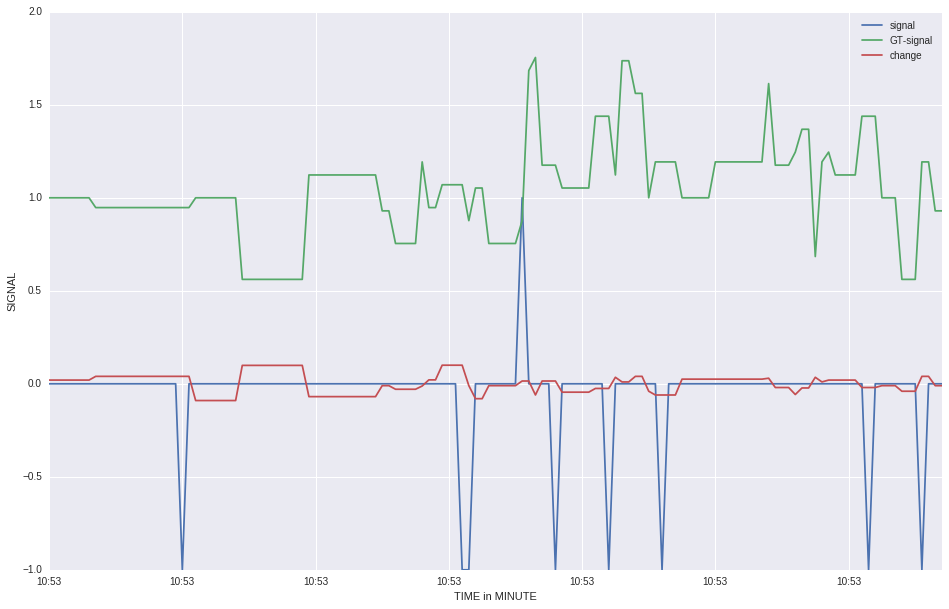

In [630]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
signal[['signal','GT-signal','change']].plot(figsize=(16, 10))
#plt.show()
plt.xlabel('TIME in MINUTE')
plt.ylabel('SIGNAL')